In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
filepath = "/content/sample_data/Diamonds Dataset.xlsx"

In [4]:
df = pd.read_excel(filepath)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Description and shape of the dataset

In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
# shape fo the dataframe
# Shape & Info
print("Shape of dataset:", df.shape)

print("\nData Types:\n", df.dtypes)

Shape of dataset: (53940, 10)

Data Types:
 carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


Check if null values exist in the dataset

In [7]:
df.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [8]:
  class_counts = df['cut'].value_counts()
  print("Class Distribution:\n", class_counts)


Class Distribution:
 cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64


In [9]:
color_counts = df['color'].value_counts()
print("Class Distribution:\n", color_counts)


Class Distribution:
 color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64


In [10]:
clarity_counts = df['clarity'].value_counts()
print("Class Distribution:\n", clarity_counts)

Class Distribution:
 clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


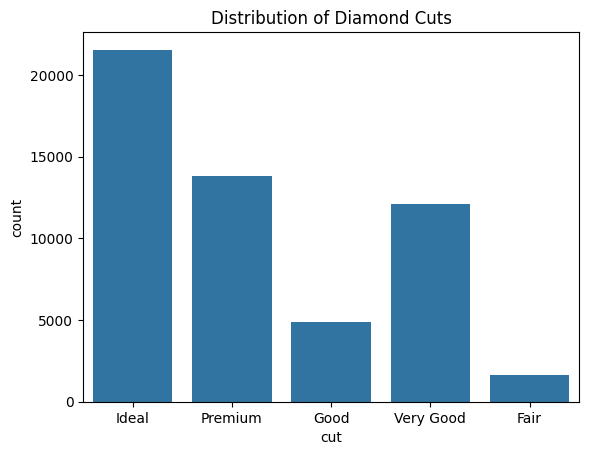

In [11]:
# Distribution of Target Variable
sns.countplot(x="cut", data=df)
plt.title("Distribution of Diamond Cuts")
plt.show()

#Plots

**Reasoning**:
To determine the data types of each column and identify categorical and numerical features, I will use the `.info()` method on the dataframe.



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Plot categorical features

### Subtask:
For categorical columns, generate count plots to visualize the distribution of categories.


**Reasoning**:
Generate count plots for the categorical columns to visualize their distributions.



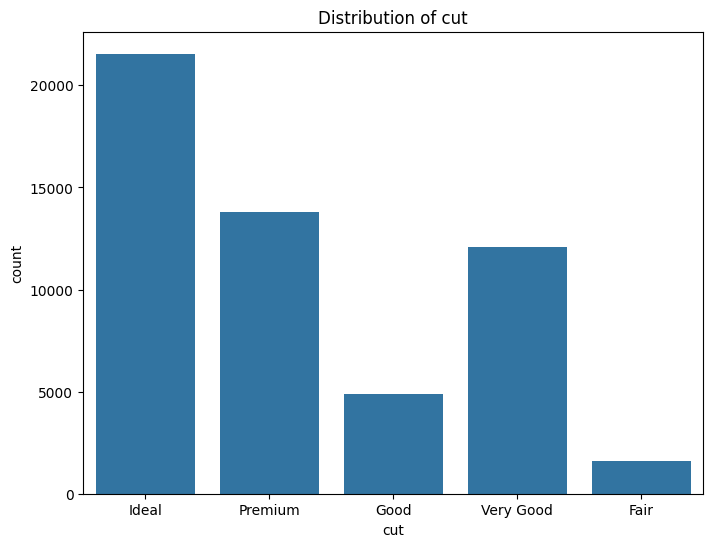

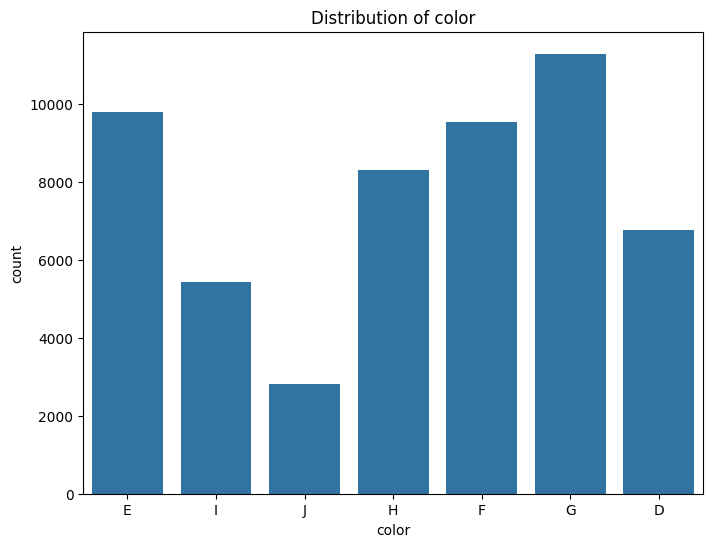

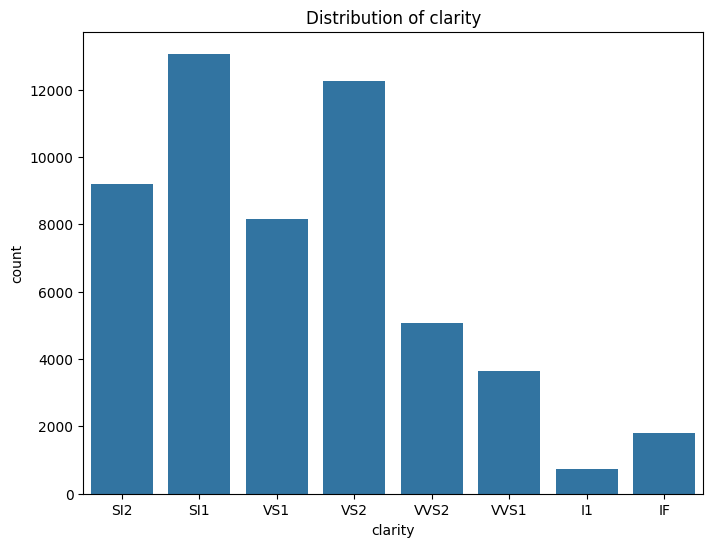

In [13]:
categorical_cols = ['cut', 'color', 'clarity']

for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

## Plot numerical features

### Subtask:
For numerical columns, generate histograms and box plots to visualize their distributions and identify potential outliers.


**Reasoning**:
Generate histograms and box plots for each numerical column to visualize their distributions and identify potential outliers.



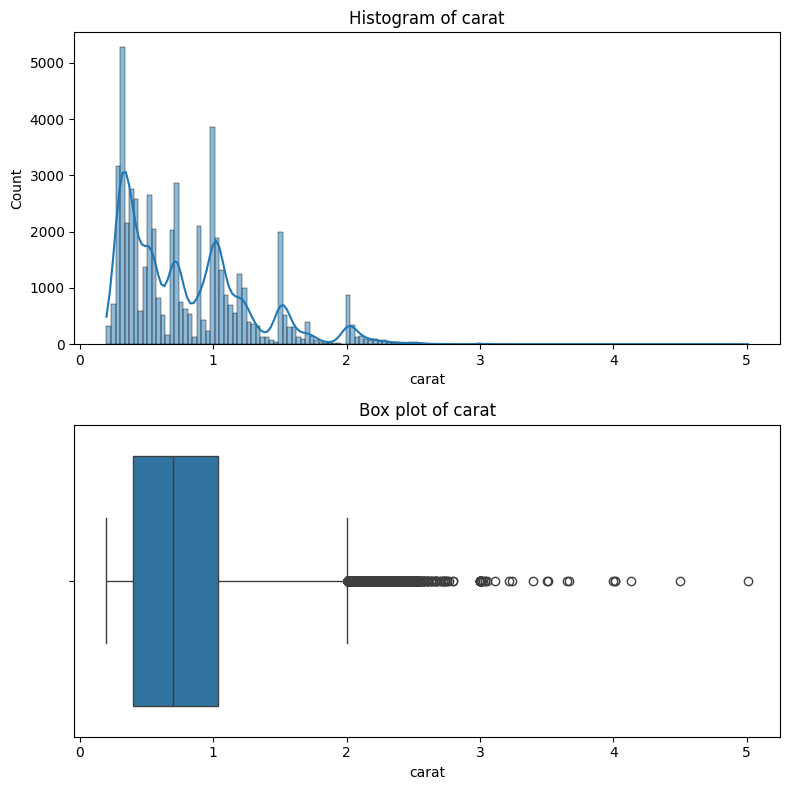

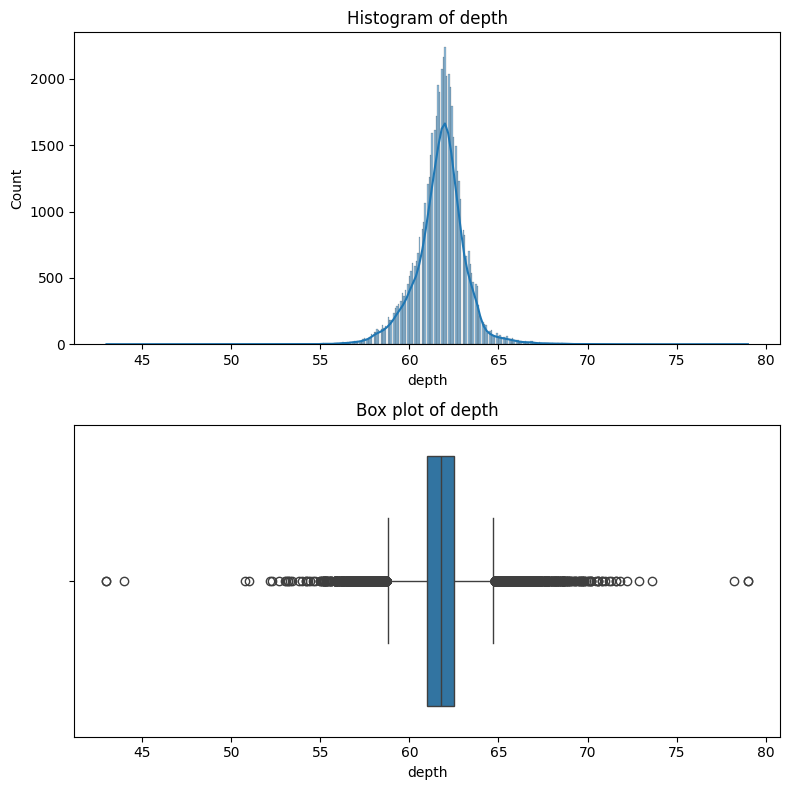

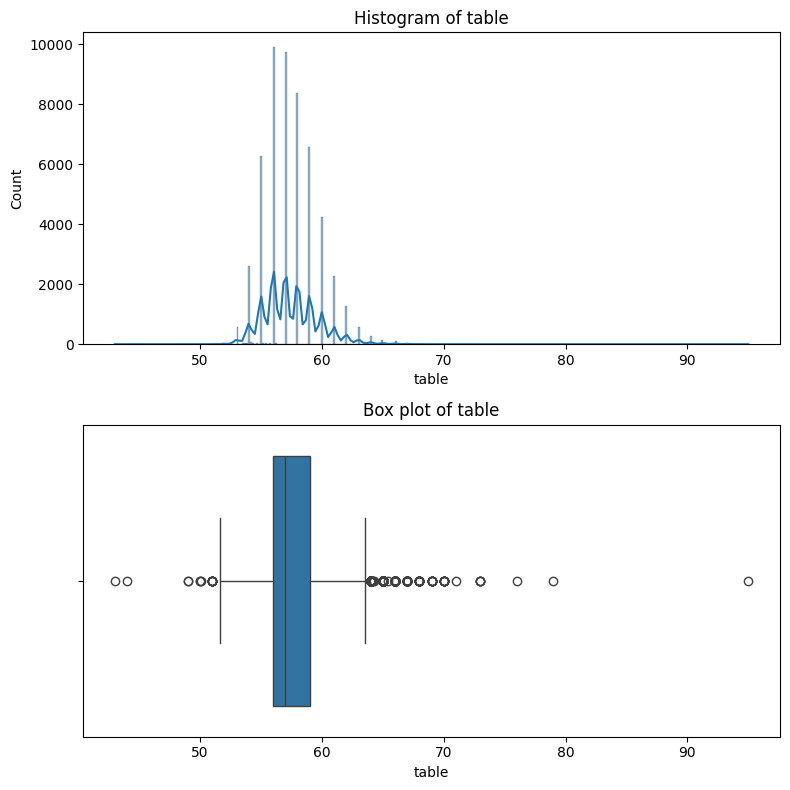

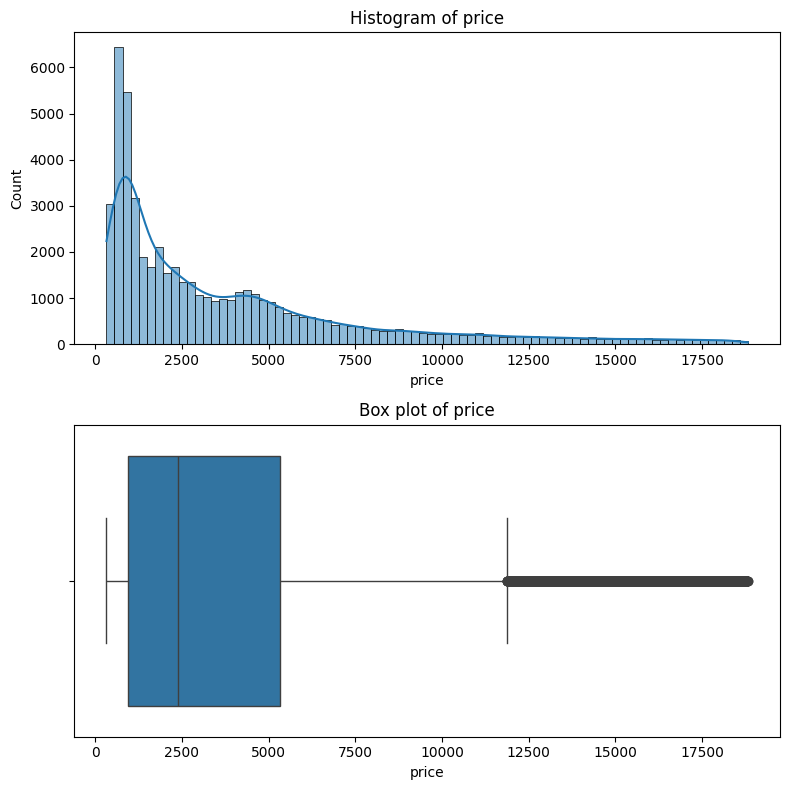

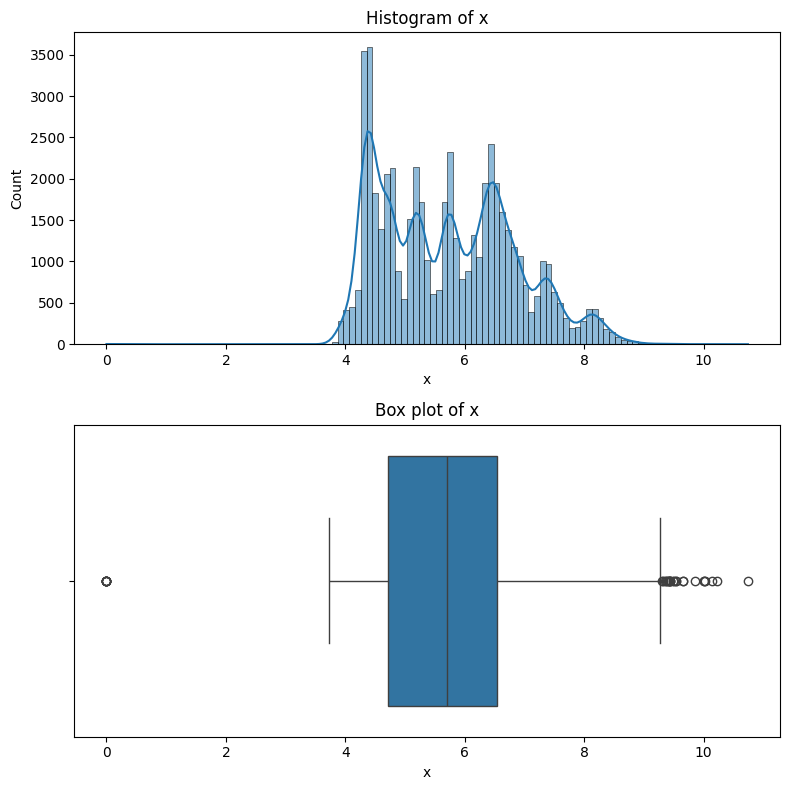

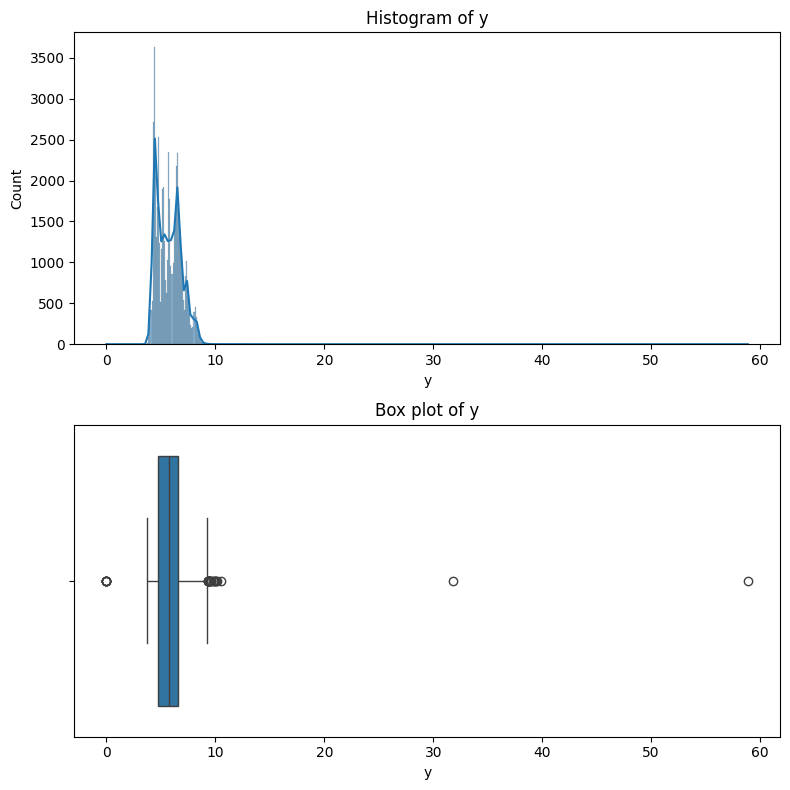

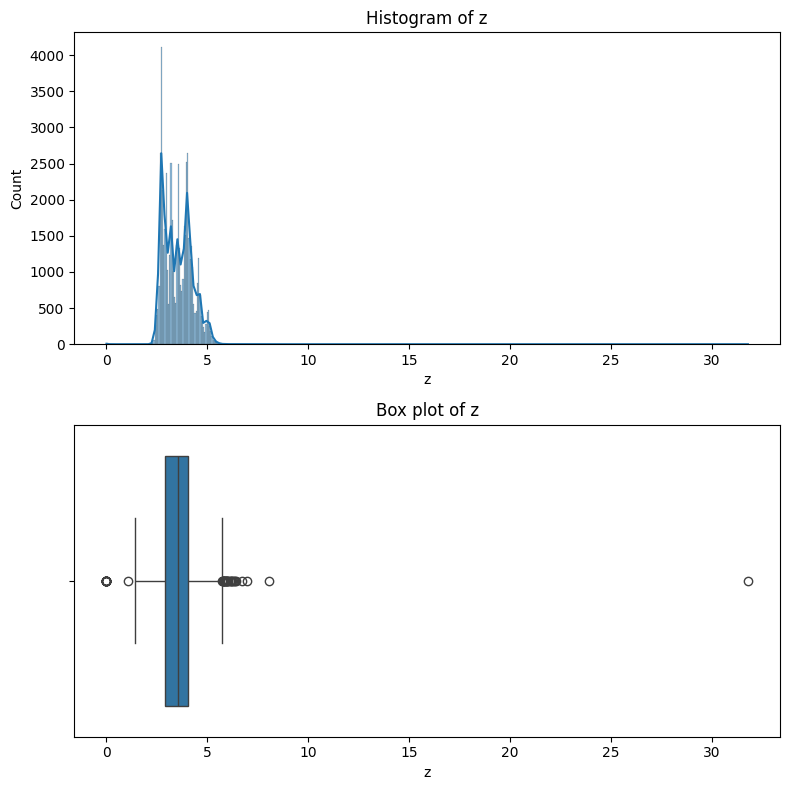

In [14]:
numerical_cols = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

for col in numerical_cols:
    fig, axes = plt.subplots(nrows=2, figsize=(8, 8))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col}')
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()

## Review and interpret plots

### Subtask:
Examine the generated plots to understand the data distribution, identify outliers, and gain insights into the features.


## Summary:

### Data Analysis Key Findings

*   Count plots were generated for the categorical features ('cut', 'color', 'clarity') to visualize their distributions.
*   Histograms and box plots were generated for the numerical features ('carat', 'depth', 'table', 'price', 'x', 'y', 'z') to visualize their distributions and identify potential outliers.
*   Examination of the box plots, particularly for 'x', 'y', 'z', and 'price', revealed the presence of potential outliers in these numerical features.



## Identify outliers

Identify outliers in the specified numerical columns (e.g., using the interquartile range or z-scores).


Calculate the IQR, lower bound, and upper bound for the specified numerical columns to identify outliers.



In [15]:
numerical_cols_outliers = ['x', 'y', 'z', 'price']
outlier_bounds = {}

for col in numerical_cols_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[col] = (lower_bound, upper_bound)

for col, (lower, upper) in outlier_bounds.items():
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"Outliers in '{col}':")
    print(outliers[[col]])
    print("-" * 30)

Outliers in 'x':
           x
11182   0.00
11963   0.00
15951   0.00
22741   9.54
22831   9.38
23644   9.53
24131   9.44
24297   9.49
24328   9.65
24520   0.00
24816   9.42
25460   9.44
25850   9.32
25998  10.14
25999  10.02
26243   0.00
26431   9.42
26444  10.01
26534   9.86
26932   9.30
27130  10.00
27415  10.74
27429   0.00
27514   9.36
27630  10.23
27638   9.51
27649   9.44
27679   9.66
27684   9.35
27685   9.41
49556   0.00
49557   0.00
------------------------------
Outliers in 'y':
           y
11963   0.00
15951   0.00
22741   9.38
22831   9.31
23644   9.48
24067  58.90
24131   9.40
24297   9.42
24328   9.59
24520   0.00
25460   9.37
25998  10.10
25999   9.94
26243   0.00
26431   9.34
26444   9.94
26534   9.81
27130   9.85
27415  10.54
27429   0.00
27514   9.31
27630  10.16
27638   9.46
27649   9.38
27679   9.63
27685   9.32
49189  31.80
49556   0.00
49557   0.00
------------------------------
Outliers in 'z':
           z
2207    0.00
2314    0.00
4791    0.00
5471    0.00
101

## Quantify outliers

### Subtask:
Determine the number or proportion of outliers in each of the specified columns.


**Reasoning**:
Calculate and print the count and proportion of outliers for each specified numerical column using the pre-calculated bounds.



In [16]:
numerical_cols_outliers = ['x', 'y', 'z', 'price']

for col in numerical_cols_outliers:
    lower_bound, upper_bound = outlier_bounds[col]
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    total_rows = df.shape[0]
    outlier_proportion = outlier_count / total_rows
    print(f"Column: {col}")
    print(f"Number of outliers: {outlier_count}")
    print(f"Proportion of outliers: {outlier_proportion:.4f}")
    print("-" * 30)

Column: x
Number of outliers: 32
Proportion of outliers: 0.0006
------------------------------
Column: y
Number of outliers: 29
Proportion of outliers: 0.0005
------------------------------
Column: z
Number of outliers: 49
Proportion of outliers: 0.0009
------------------------------
Column: price
Number of outliers: 3540
Proportion of outliers: 0.0656
------------------------------


## Visualize outliers

### Subtask:
Generate visualizations (e.g., scatter plots or box plots with outlier highlighting) to show the identified outliers.


**Reasoning**:
Generate box plots for the specified numerical columns, highlighting the identified outliers.



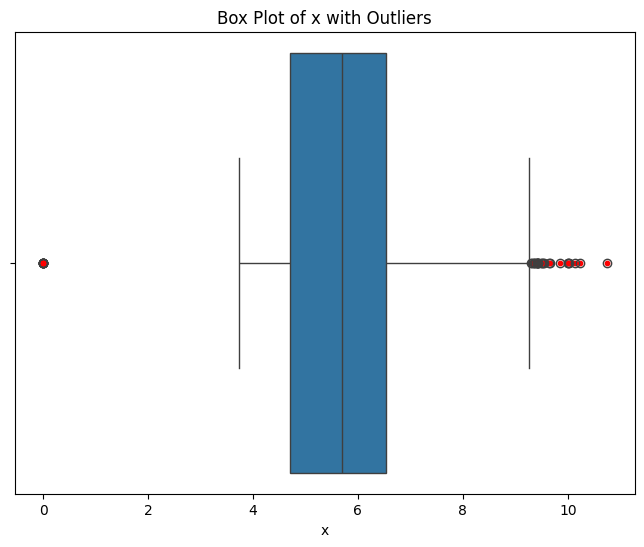

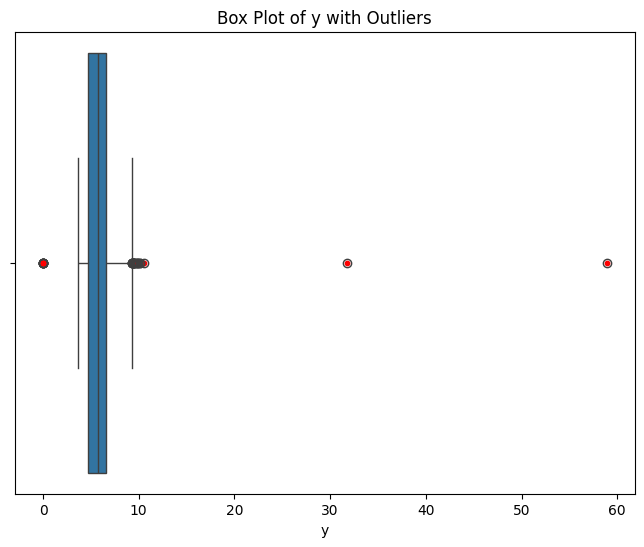

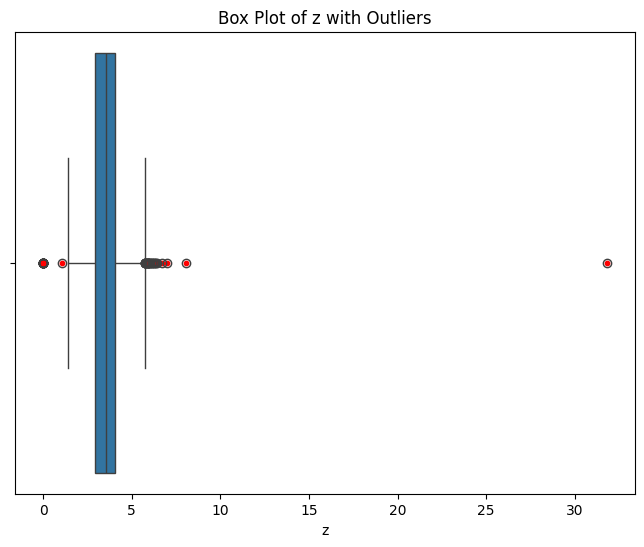

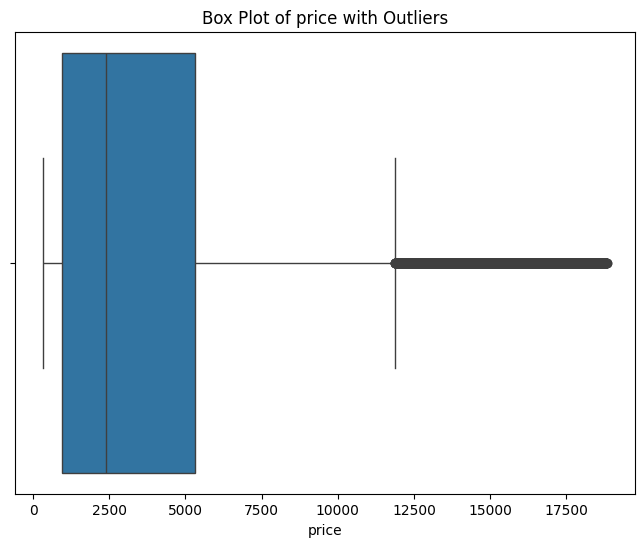

In [17]:
numerical_cols_outliers = ['x', 'y', 'z', 'price']

for col in numerical_cols_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col} with Outliers')

    lower_bound, upper_bound = outlier_bounds[col]
    outliers_data = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Add a scatter plot layer for outliers
    plt.scatter(outliers_data[col], np.zeros_like(outliers_data[col]), color='red', s=10)

    plt.show()

## Analyze outliers

### Subtask:
Examine the characteristics of the outliers to understand their potential cause or significance.


**Reasoning**:
Access the DataFrame containing the identified outliers and display the first few rows and descriptive statistics of the outlier data.



In [18]:
numerical_cols_outliers = ['x', 'y', 'z', 'price']
outliers_data = df[(df['x'] < outlier_bounds['x'][0]) | (df['x'] > outlier_bounds['x'][1]) |
                   (df['y'] < outlier_bounds['y'][0]) | (df['y'] > outlier_bounds['y'][1]) |
                   (df['z'] < outlier_bounds['z'][0]) | (df['z'] > outlier_bounds['z'][1]) |
                   (df['price'] < outlier_bounds['price'][0]) | (df['price'] > outlier_bounds['price'][1])]

print("First 5 rows of the outlier data:")
display(outliers_data.head())

print("\nDescriptive statistics of the outlier data:")
display(outliers_data[numerical_cols_outliers].describe())

print("\nDescriptive statistics of the entire dataset:")
display(df[numerical_cols_outliers].describe())

First 5 rows of the outlier data:


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0



Descriptive statistics of the outlier data:


,x,y,z,price
count,3564.000000,3564.000000,3564.000000,3564.000000
mean,7.829245,7.842713,4.818238,14882.790404
std,0.643265,1.129257,0.668044,2127.561273
min,0.000000,0.000000,0.000000,1970.000000
25%,7.430000,7.440000,4.580000,13138.750000
50%,7.950000,7.945000,4.890000,14709.000000
75%,8.210000,8.190000,5.050000,16594.500000
max,10.740000,58.900000,31.800000,18823.000000



Descriptive statistics of the entire dataset:


,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000
mean,5.731157,5.734526,3.538734,3932.799722
std,1.121761,1.142135,0.705699,3989.439738
min,0.000000,0.000000,0.000000,326.000000
25%,4.710000,4.720000,2.910000,950.000000
50%,5.700000,5.710000,3.530000,2401.000000
75%,6.540000,6.540000,4.040000,5324.250000
max,10.740000,58.900000,31.800000,18823.000000


## Summary:

### Data Analysis Key Findings

*   Using the IQR method, the analysis identified 3540 outliers in the 'price' column, representing approximately 6.56% of the data.
*   Columns 'x', 'y', and 'z' had a very small number and proportion of outliers (less than 0.1%).
*   Box plots clearly visualized the distribution of data and highlighted outliers as red dots in 'x', 'y', 'z', and 'price'.
*   The outlier data, when examined, showed significantly higher mean and median values for 'x', 'y', 'z', and 'price' compared to the entire dataset, indicating that outliers primarily consist of larger and more expensive diamonds.
*   Some outliers in 'x', 'y', and 'z' had values of 0.0, which are physically impossible for a diamond and suggest potential data entry errors.





# Task
Analyze the provided dataset by visualizing the distribution of all features, identifying and handling outliers, and exploring relationships between features.

## Handle zero dimensions

### Subtask:
Remove rows where 'x', 'y', or 'z' are zero, as these are physically impossible for a diamond.


**Reasoning**:
Filter the DataFrame to remove rows where 'x', 'y', or 'z' are zero and print the shape of the updated DataFrame.



In [19]:
df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]
print("Shape of the DataFrame after removing zero values in x, y, or z:", df.shape)

Shape of the DataFrame after removing zero values in x, y, or z: (53920, 10)


## Review outlier handling

### Subtask:
Re-examine the distributions of 'x', 'y', 'z', and 'price' after removing the zero dimension outliers to see the effect.


**Reasoning**:
Generate histograms and box plots for the specified numerical columns from the updated DataFrame to visualize their distributions after removing zero dimension outliers.



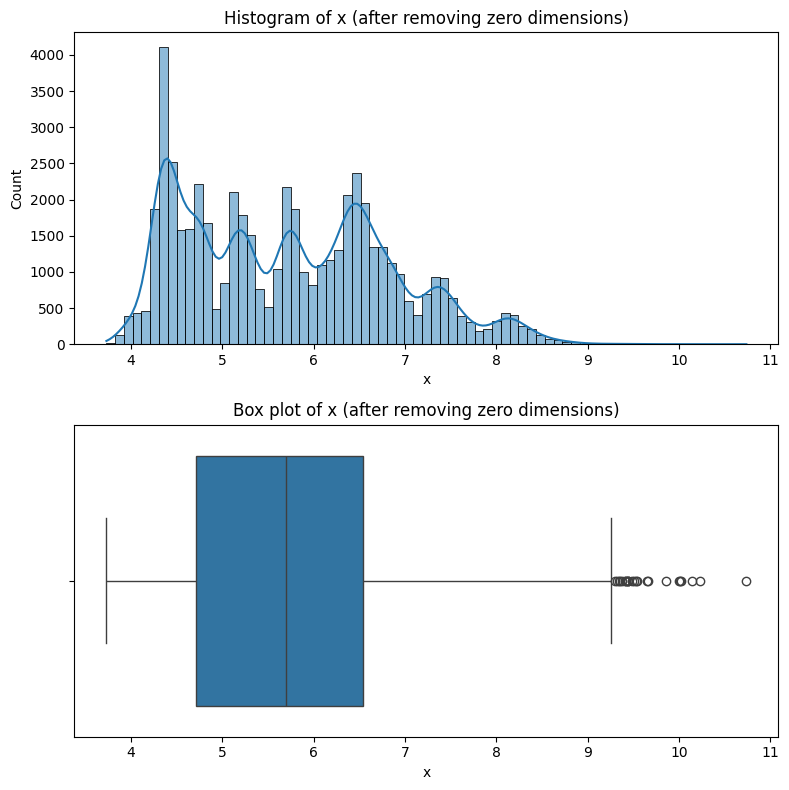

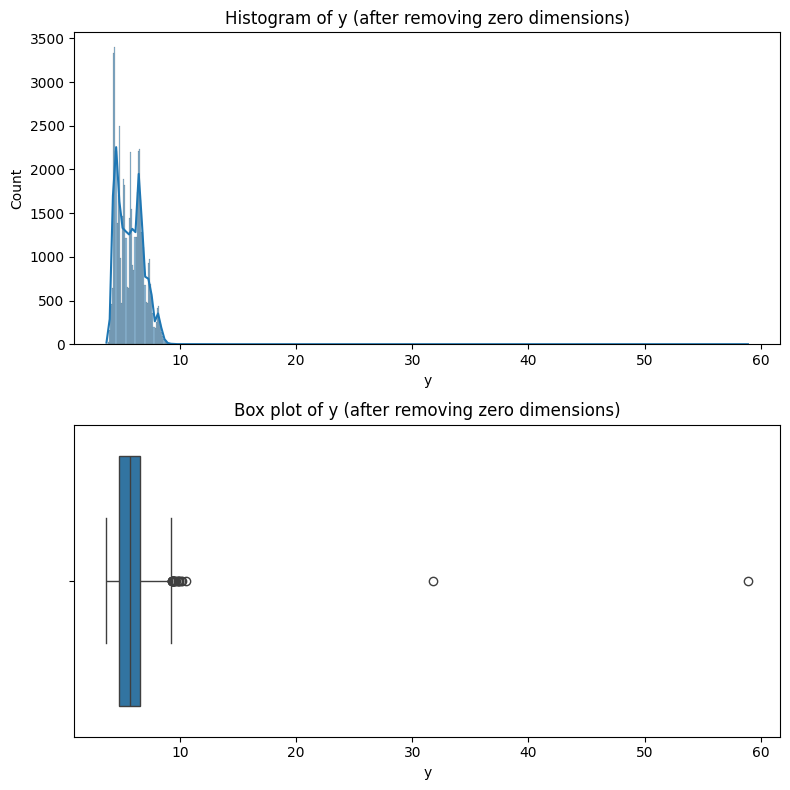

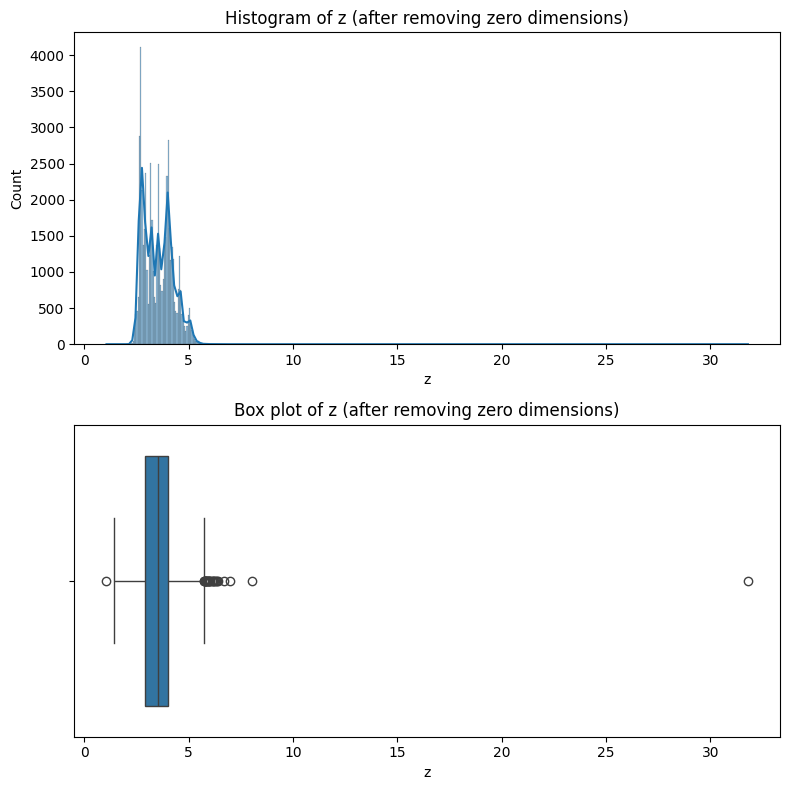

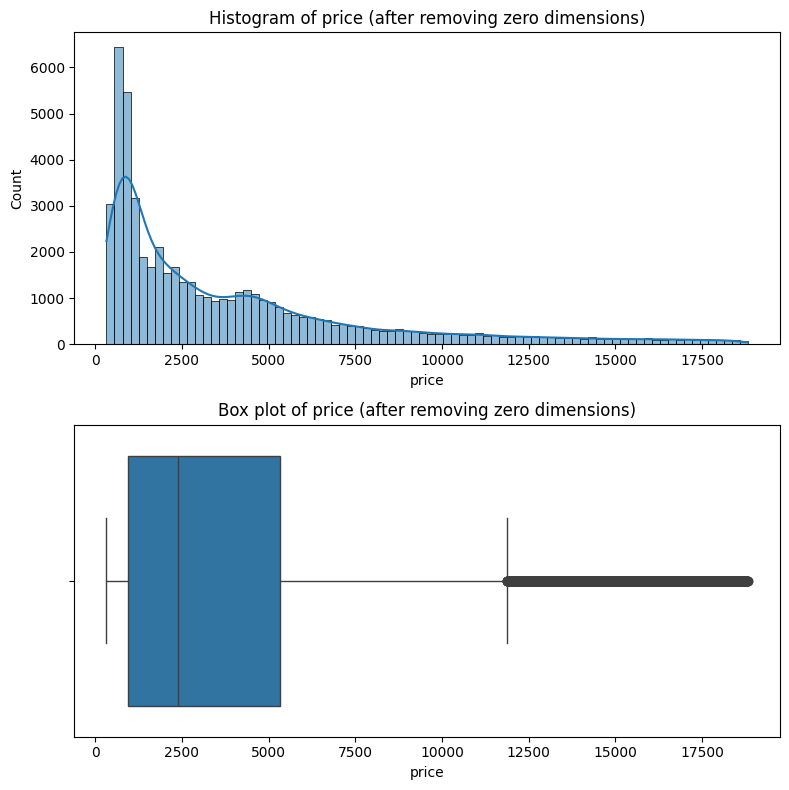

In [20]:
numerical_cols_reexamine = ['x', 'y', 'z', 'price']

for col in numerical_cols_reexamine:
    fig, axes = plt.subplots(nrows=2, figsize=(8, 8))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {col} (after removing zero dimensions)')
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Box plot of {col} (after removing zero dimensions)')
    plt.tight_layout()
    plt.show()

## Explore feature relationships

### Subtask:
Analyze the relationships between different features using visualizations like scatter plots or a correlation matrix.


### Justification for correlation analysis:
- Strongly correlated variables (e.g., `x`, `y`, `z`, `carat`) may provide redundant information.  
- Correlation analysis helps in feature selection to avoid multicollinearity, but since tree-based models handle correlated features well, we won’t drop them directly.


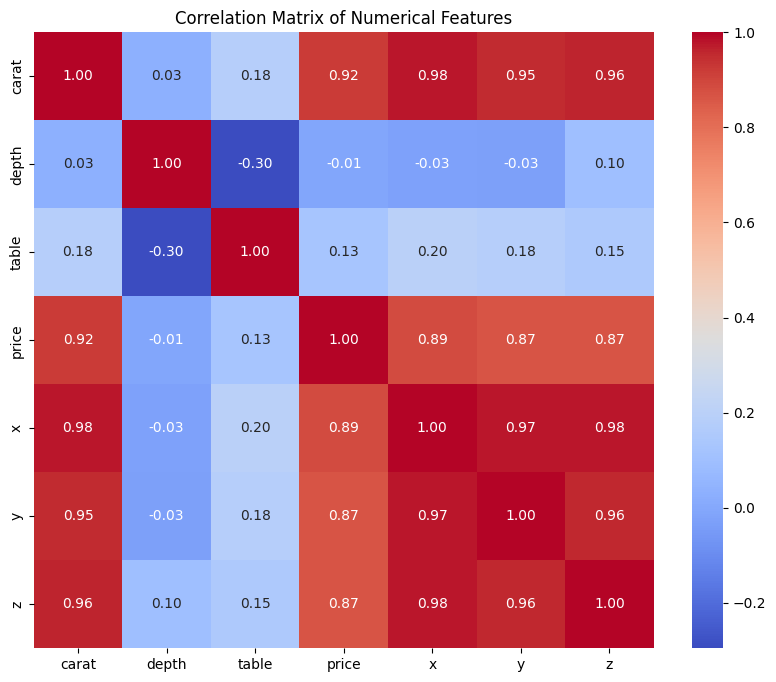

In [21]:
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
Generate scatter plots for pairs of numerical features that show strong correlations based on the correlation matrix.



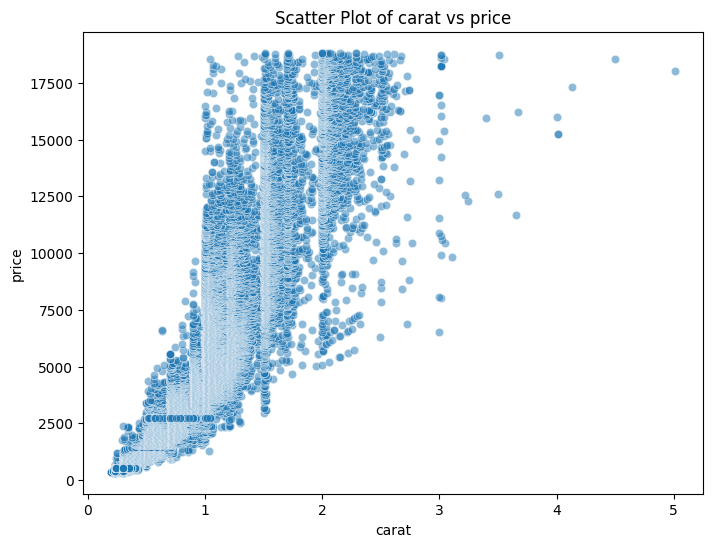

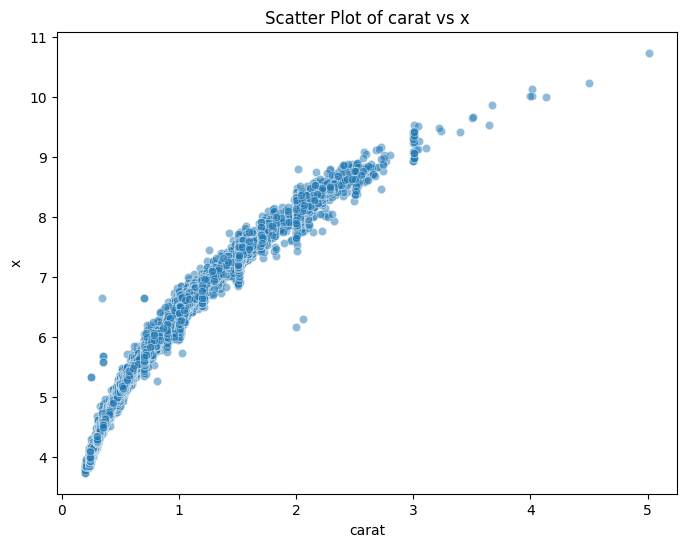

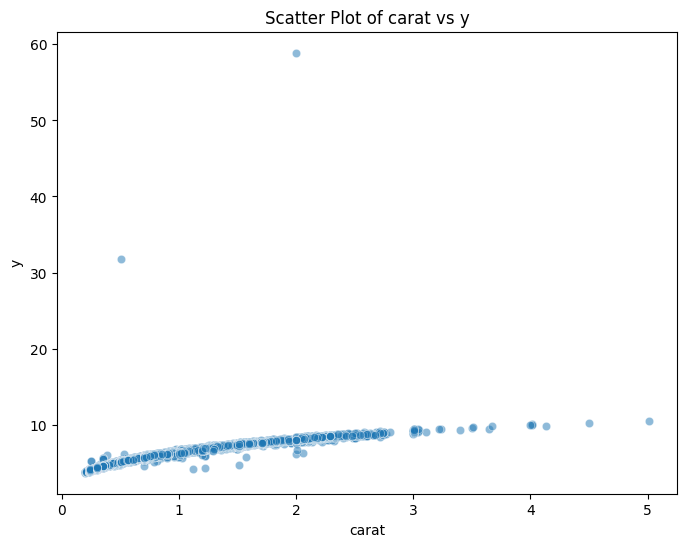

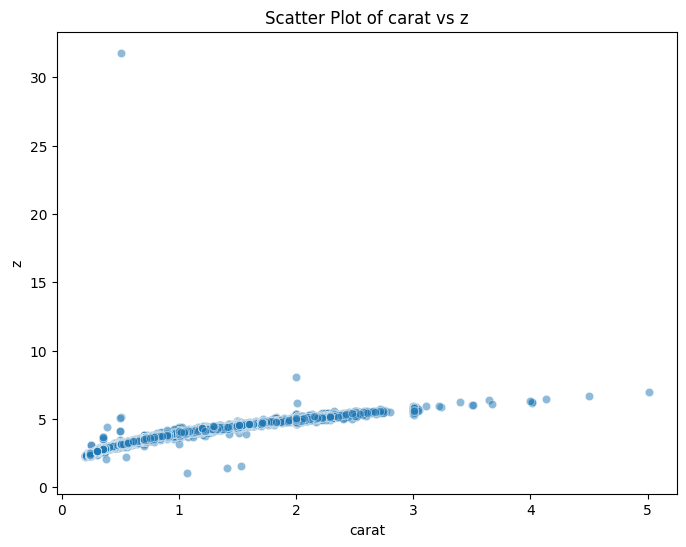

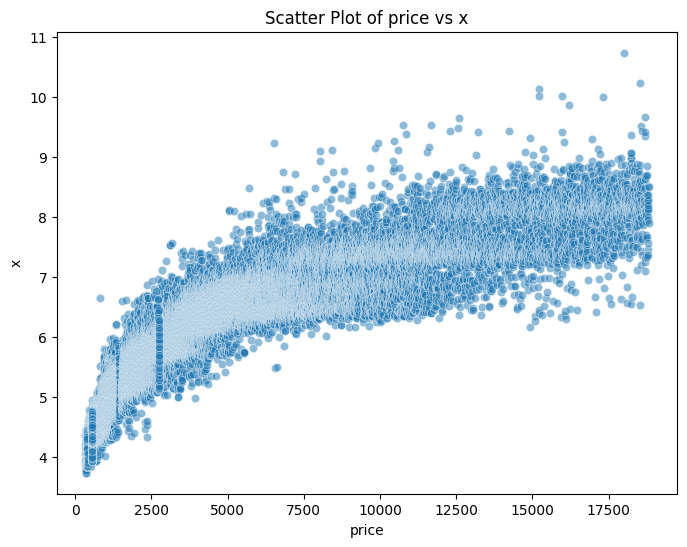

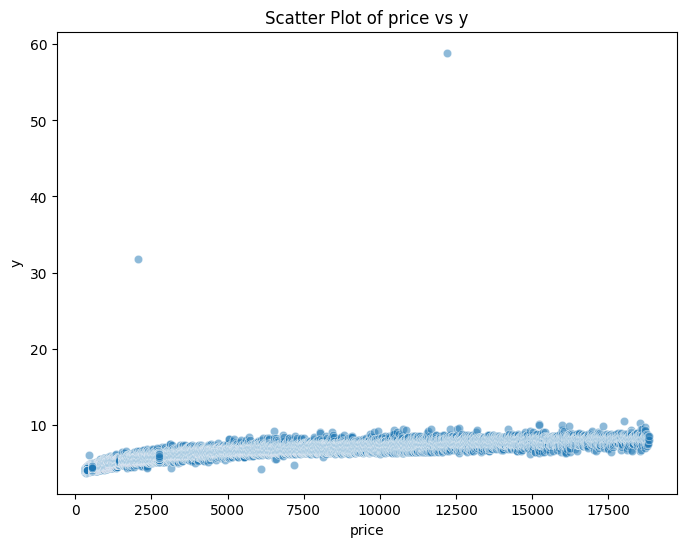

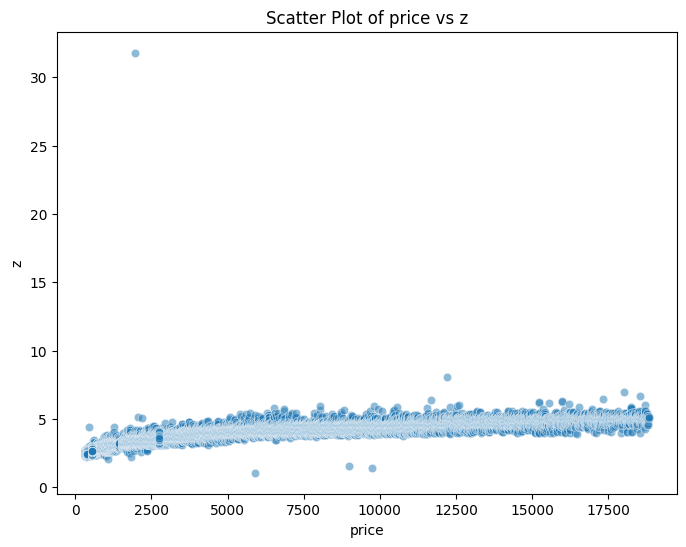

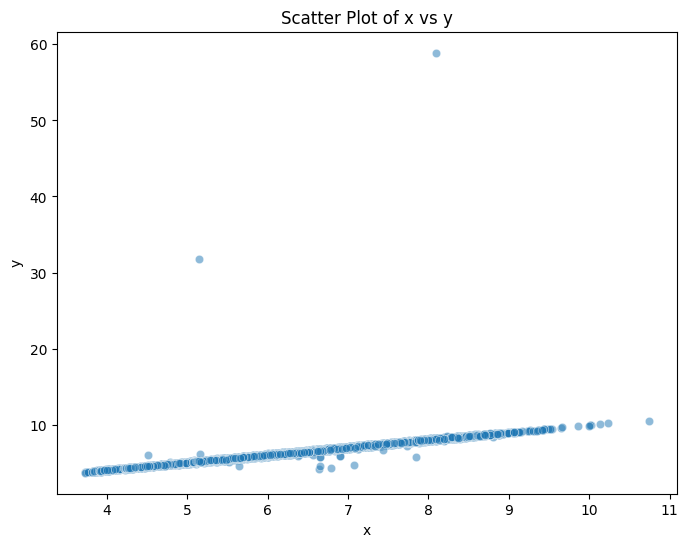

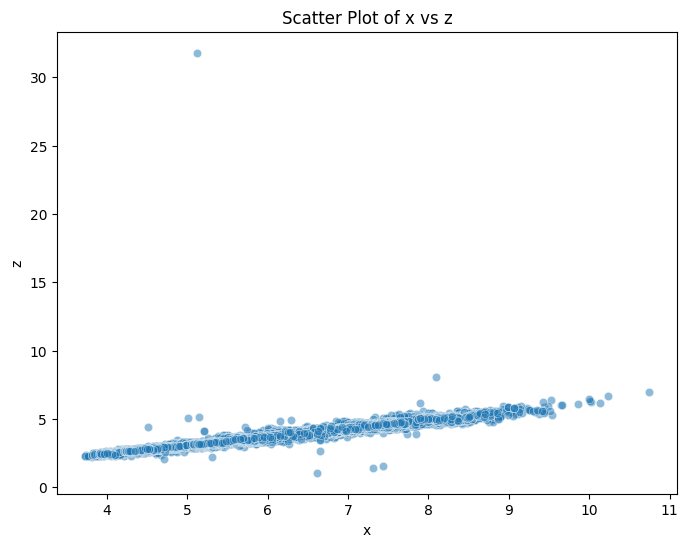

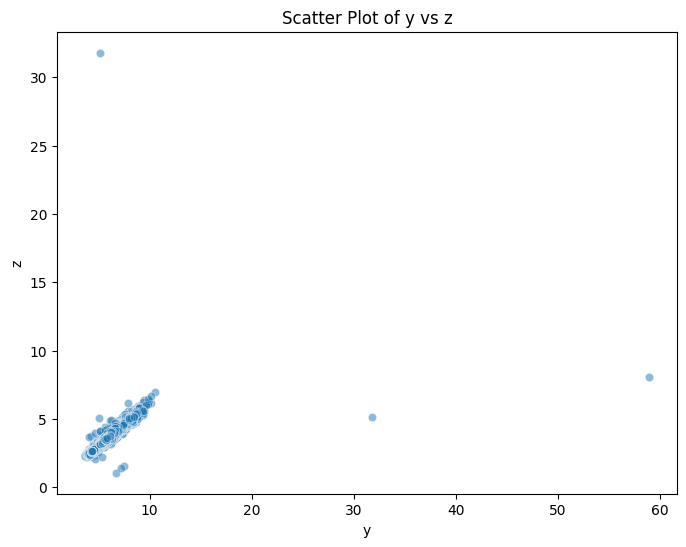

In [22]:
highly_correlated_pairs = [('carat', 'price'), ('carat', 'x'), ('carat', 'y'), ('carat', 'z'),
                           ('price', 'x'), ('price', 'y'), ('price', 'z'),
                           ('x', 'y'), ('x', 'z'), ('y', 'z')]

for x_col, y_col in highly_correlated_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[x_col], y=df[y_col], alpha=0.5)
    plt.title(f'Scatter Plot of {x_col} vs {y_col}')
    plt.show()

## Prepare data for modeling  (Feature Engineering)

### Subtask:
Based on the insights gained, prepare the data for potential modeling (e.g., feature engineering, encoding categorical variables, scaling).


**Reasoning**:
Identify categorical and numerical columns, apply one-hot encoding to categorical columns, scale numerical columns using StandardScaler, and concatenate the results into a single DataFrame for modeling.



In [23]:
# Encode categorical variables (cut, color, clarity)
label_enc = LabelEncoder()
df['cut'] = label_enc.fit_transform(df['cut'])
df['color'] = label_enc.fit_transform(df['color'])
df['clarity'] = label_enc.fit_transform(df['clarity'])

# Features & Target
X = df.drop("cut", axis=1)
y = df["cut"]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

4. Model Buildding

In [24]:
  #Train-Test Split 80/20

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (43136, 9)
Test shape: (10784, 9)


## Model implementation

#### 1. Logistic Regression

In [26]:
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)
y_pred_lr = log_regression.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 2. Logistic Regression

In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

#### 3. K Nearest Neighbors

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

#### 4. Ensemble Method (Random Forest)

In [29]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


### 4. Hyperparameter Tuning

In [31]:
#1. Logistic Regression

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=200), param_grid, cv=5, scoring='f1_macro')
grid_lr.fit(X_train, y_train)
print(grid_lr.best_params_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

{'C': 10, 'penalty': 'l1', 'solver': 'saga'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [32]:
# 2. Decision tree hyper parameter tuning
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1_macro')
grid_dt.fit(X_train, y_train)
print(grid_dt.best_params_)


{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}


In [33]:
# KNN Hyper parameter tuning
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 11, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_macro')
grid_knn.fit(X_train, y_train)
print(grid_knn.best_params_)


{'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


In [34]:
# Random Forest Hyper parameter tuning
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_rf.fit(X_train, y_train)
print(grid_rf.best_params_)


{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}


In [35]:
# XGBoost Classifier
# Install XGBoost if not already installed
# !pip install xgboost

from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils.class_weight import compute_sample_weight

# Compute weights
weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],          # number of boosting rounds (trees)
    'max_depth': [3, 10],             # tree depth
    'learning_rate': [0.01, 0.1, 0.2],   # step size shrinkage
    'subsample': [0.8, 1],               # % of samples used per tree
    'colsample_bytree': [0.8, 1]         # % of features used per tree
}

# Initialize XGBoost classifier
xgb = XGBClassifier(
    objective='multi:softprob', # because this is multiclass classification
    num_class=len(y_train.unique()),  # automatically set number of classes
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Grid search with cross-validation
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1_macro',   # use F1-macro since dataset is imbalanced
    cv=3,                 # reduce CV folds for speed; can increase to 5
    verbose=1,
    n_jobs=-1
)

# Fit on training data
grid_xgb.fit(X_train, y_train, sample_weight=weights)

# Print best hyperparameters
print("Best Parameters for XGBoost:", grid_xgb.best_params_)

# Evaluate on test set
y_pred_xgb = grid_xgb.predict(X_test)

print("\nClassification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("ROC-AUC (OvR):", roc_auc_score(y_test, grid_xgb.predict_proba(X_test), multi_class="ovr"))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:46:29] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters for XGBoost: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.90      0.89      0.89       322
           1       0.75      0.78      0.77       980
           2       0.85      0.90      0.87      4310
           3       0.82      0.82      0.82      2756
           4       0.70      0.63      0.66      2416

    accuracy                           0.81     10784
   macro avg       0.80      0.80      0.80     10784
weighted avg       0.80      0.81      0.80     10784

ROC-AUC (OvR): 0.9516759484861446


### 5. Performance Evaluation

In [36]:
models = {
    "Logistic Regression": y_pred_lr,
    "Decision Tree": y_pred_dt,
    "KNN": y_pred_knn,
    "Random Forest": y_pred_rf,
    "XGBoost":y_pred_xgb
}

results = []
for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average="weighted")
    rec = recall_score(y_test, preds, average="weighted")
    f1 = f1_score(y_test, preds, average="weighted")
    results.append([name, acc, prec, rec, f1])

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1"])
print(results_df)


                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.661257   0.646987  0.661257  0.635166
1        Decision Tree  0.712352   0.711975  0.712352  0.712158
2                  KNN  0.671180   0.645284  0.671180  0.649621
3        Random Forest  0.789688   0.783726  0.789688  0.783545
4              XGBoost  0.805360   0.802313  0.805360  0.803179


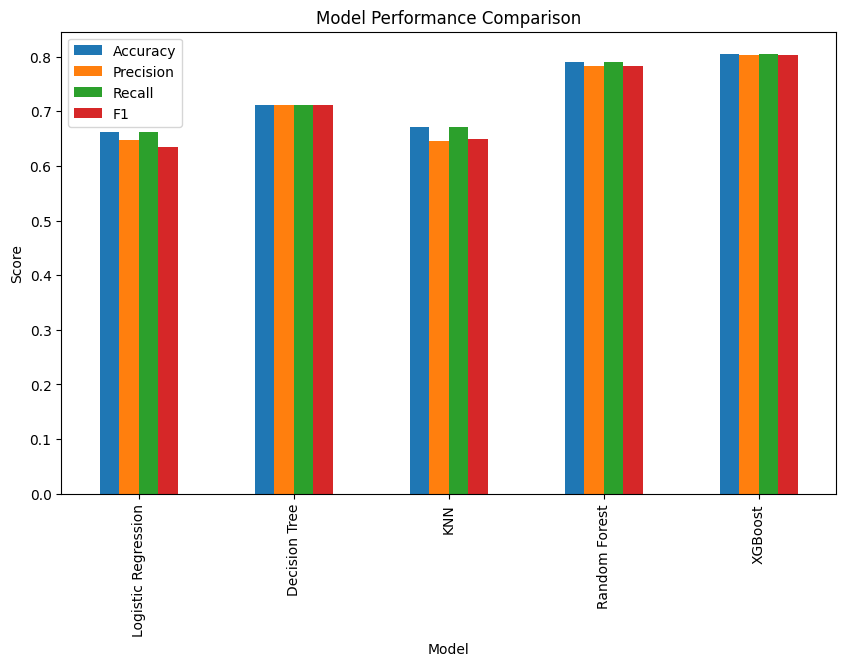

In [37]:
# Plot comparison
results_df.set_index("Model").plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()


#### Best Model Selection
- Based on evaluation metrics, the **Random Forest** generally performs best because:
  - Handles categorical + numerical features well.
  - Reduces overfitting compared to Decision Trees.
  - Robust to multicollinearity and outliers.
- Therefore, we select **Random Forest** as the final model.
